Build a Machine model to predict the type of card to be issued to a Bank Customer.

In [1]:
## Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit , RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [4]:
## Load Data from local drive

from google.colab import files
import io
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['Bank customers.csv'].decode('utf-8')))


Saving Bank customers.csv to Bank customers (1).csv


In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Perform EDA & Data Preprocessing

In [6]:
df.shape

(10127, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
###  Check for Null Values

df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


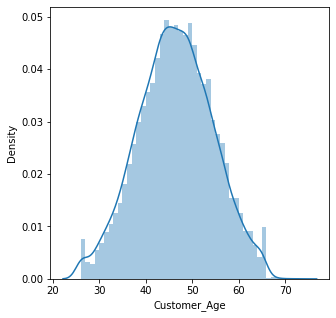

In [11]:
# Visualise 

plt.figure(figsize=(5,5))
sns.distplot(df['Customer_Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


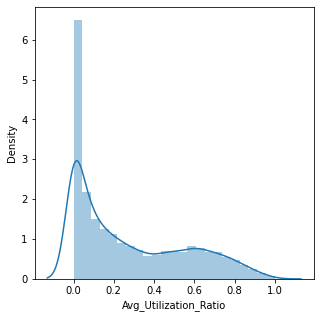

In [26]:
plt.figure(figsize=(5,5))
sns.distplot(df['Avg_Utilization_Ratio'])
plt.show()

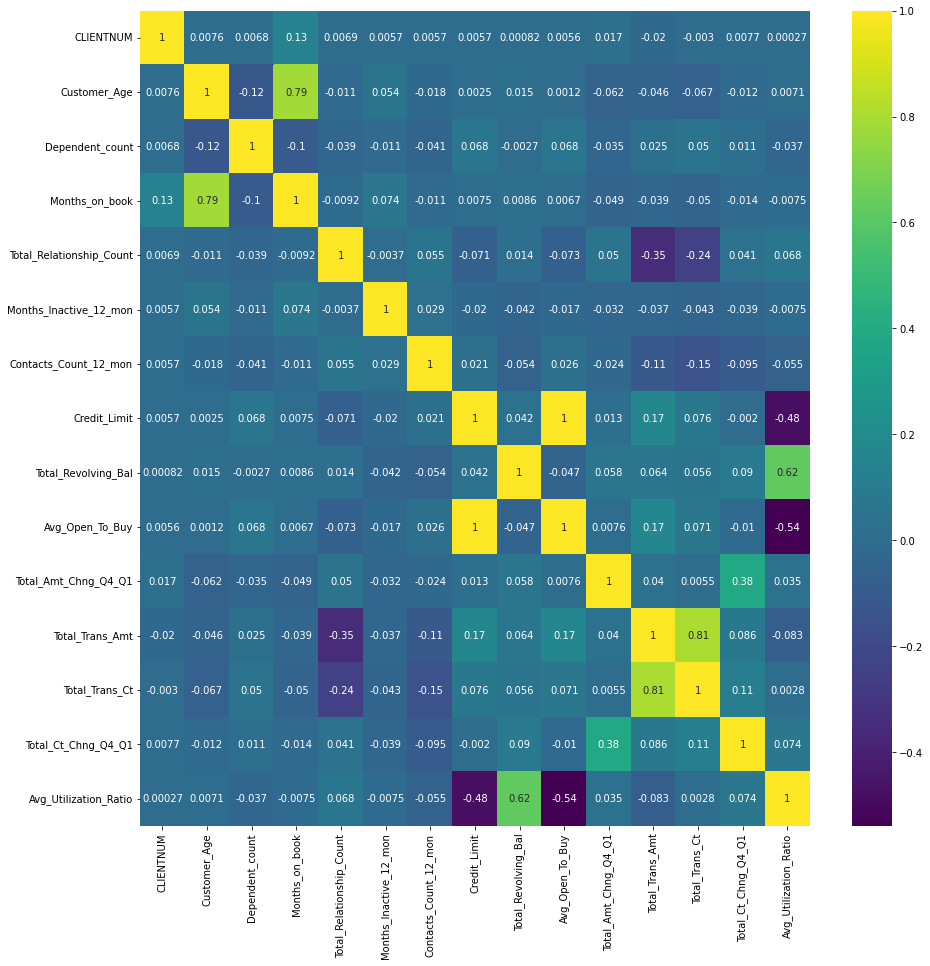

In [30]:
## Visualize Correlation using heatmap. Numerical Column

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

Visualize & Analyse the Categorical set

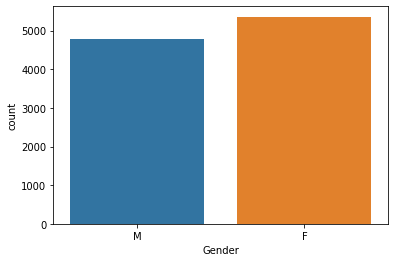

In [12]:

sns.countplot(x='Gender', data=df)
plt.show()

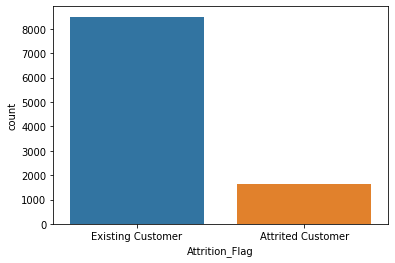

In [13]:

sns.countplot(x='Attrition_Flag', data=df)
plt.show()

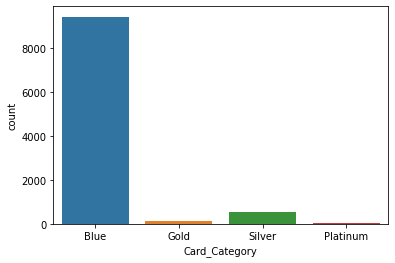

In [14]:

sns.countplot(x='Card_Category', data=df)
plt.show()

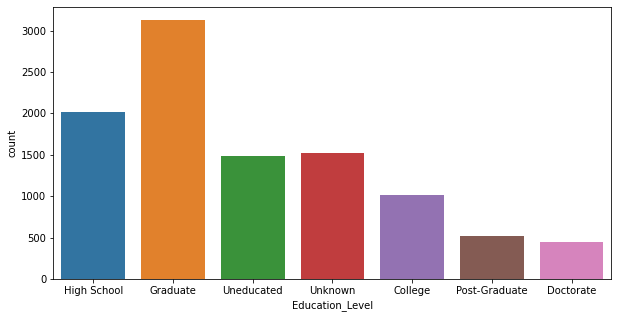

In [21]:

plt.figure(figsize=(10,5))
sns.countplot(x='Education_Level', data=df)
plt.show()

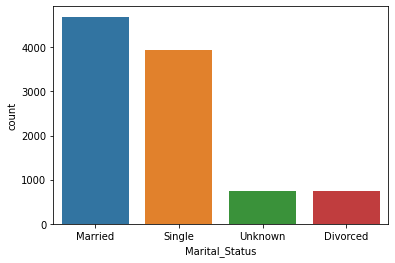

In [22]:

sns.countplot(x='Marital_Status', data=df)
plt.show()

In [36]:

df_1 = df.groupby('Marital_Status')

df_1['Card_Category'].value_counts()


Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: Card_Category, dtype: int64

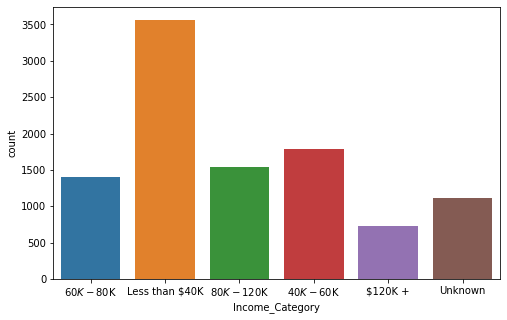

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='Income_Category', data=df)
plt.show()

In [25]:
###  Analyse Credit limit with Gender

df[['Gender','Credit_Limit']].groupby('Gender').agg(['mean','count'])


Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

In [31]:
### # Average Utilization Ratio: it's how much you currently owe divided by your credit limit. 
#  A low credit Utilization Rate shows you're using less of your available credit.

df[['Gender','Avg_Utilization_Ratio']].groupby('Gender').agg(['mean','count'])


Avg_Utilization_Ratio      
                        mean count
Gender                            
F                   0.341957  5358
M                   0.199548  4769

In [35]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

Label Encoding for Categorical sets

In [38]:
### Convert Columns to Integers

encoder = LabelEncoder()

In [39]:

df['Gender'] = encoder.fit_transform(df['Gender'])

df['Attrition_Flag'] = encoder.fit_transform(df['Attrition_Flag'])

df['Card_Category'] = encoder.fit_transform(df['Card_Category'])

df['Income_Category'] = encoder.fit_transform(df['Income_Category'])

df['Education_Level'] = encoder.fit_transform(df['Education_Level'])

df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])



Split data into Dependent & Independent

In [44]:
X = df.drop(['Card_Category', 'CLIENTNUM'], axis = 1)

Y = df['Card_Category']

Split the data into Training & Testing Data

In [47]:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)


In [48]:
print(X.shape, Xtrain.shape, Xtest.shape)

(10127, 19) (8101, 19) (2026, 19)


RandomForestClassifier ML Model

In [49]:

random_1 = RandomForestClassifier(n_estimators=300, n_jobs = -1)


In [50]:
random_1.fit(Xtrain, Ytrain)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [53]:
random_1.predict(Xtest)

array([0, 0, 0, ..., 0, 0, 3])

In [51]:
#Checking the accuracy for Train

random_1_accuracy = round(random_1.score(Xtrain, Ytrain)*100, 2)

print(round(random_1_accuracy, 2), '%')

100.0 %


In [52]:
#Checking the accuracy for Test

random_1_accuracy1 = round(random_1.score(Xtest, Ytest)*100, 2)

print(round(random_1_accuracy1, 2), '%')


95.31 %


In [65]:
### Check R Squared Value

r2_score(random_1.predict(Xtest), Ytest)

0.2760124822321466

In [66]:
### Display Actual and Predicted Data

pd.DataFrame(np.c_[Ytest , random_1.predict(Xtest)], columns = ['Actual' , 'Predicted'])


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2021,0,0
2022,0,0
2023,0,0
2024,0,0



Using RandomForestRegressor ML Model

In [56]:

random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)


In [60]:

random_model.fit(Xtrain, Ytrain)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [61]:
random_model.predict(Xtest)

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       2.58666667])

In [62]:
#Checking the accuracy for Train

random_model_accuracy = round(random_model.score(Xtrain, Ytrain)*100, 2)

print(round(random_model_accuracy, 2), '%')


97.06 %


In [63]:
#Checking the accuracy for Test

random_model_accuracy1 = round(random_model.score(Xtest, Ytest)*100, 2)

print(round(random_model_accuracy1, 2), '%')


75.38 %


In [64]:
### Check R Squared Value

r2_score(random_model.predict(Xtest), Ytest)

0.6895615716504144

In [68]:
### Display Actual and Predicted Data

pd.DataFrame(np.c_[Ytest , random_model.predict(Xtest)], columns = ['Actual' , 'Predicted'])


,Actual,Predicted
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
2021,0.0,0.000000
2022,0.0,0.000000
2023,0.0,0.000000
2024,0.0,0.000000


Linear Regression Model

In [70]:
reg = LinearRegression()

reg.fit(Xtrain, Ytrain)

LinearRegression()

In [71]:
reg.predict(Xtest)

array([ 0.02244767, -0.19492042,  0.03760617, ...,  0.12496641,
        0.10097617,  0.92824615])

In [72]:
#Checking the accuracy for Train

reg_accuracy = round(reg.score(Xtrain, Ytrain)*100, 2)

print(round(reg_accuracy, 2), '%')

25.84 %


In [73]:
#Checking the accuracy for Test

reg_accuracy2 = round(reg.score(Xtest, Ytest)*100, 2)

print(round(reg_accuracy2, 2), '%')

28.45 %


In [74]:
### Check R Squared Value

r2_score(reg.predict(Xtest), Ytest)

-1.9547346832061017

In [75]:
### Display Actual and Predicted Data

pd.DataFrame(np.c_[Ytest , reg.predict(Xtest)], columns = ['Actual' , 'Predicted'])


,Actual,Predicted
0,0.0,0.022448
1,0.0,-0.194920
2,0.0,0.037606
3,0.0,-0.111688
4,0.0,-0.185436
...,...,...
2021,0.0,0.218542
2022,0.0,0.113682
2023,0.0,0.124966
2024,0.0,0.100976


### RandomForestClassifier has the highest accuracy

In [87]:

### Save the trained model as a pickle string.

import pickle 

saved_model = pickle.dump(random_1, open('BankCards.pickle','wb'))
